In [1]:
#import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle

### 1. Carga de Datos

En este caso, tenemos tres conjuntos de datos con las mismas columnas pero diferentes tamaños y datos. A diferencia de df1 y df2, df3 tiene una variable objetivo con tres clases: 0, 1 y 2, que representan diferentes tipos de diabetes (1. Prediabetes, 2. Diabetes, 0. Sin diabetes). Dado que la mayoría de los datos están en formato binario (0 o 1), aplicaremos una transformación a df3 para convertir la variable objetivo en formato binario (0 o 1), indicando si la diabetes está presente o no.


In [2]:
df1 = pd.read_csv("./data/dia1.csv")
df2 = pd.read_csv("./data/dia2.csv")
df3 = pd.read_csv("./data/dia3.csv")

In [3]:
df3["Diabetes_binary"] = df3['Diabetes_012']
df3.drop(['Diabetes_012'], inplace=True, axis =1)

In [4]:
df = pd.concat([df1, df2, df3])
df["Diabetes_binary"].replace(2, 1, inplace=True)

In [29]:
df_muestra = df.head(150)

In [30]:
df_muestra

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,12.0,3.0,1.0
146,0.0,1.0,1.0,1.0,39.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,4.0,15.0,3.0,1.0,1.0,9.0,3.0,3.0
147,0.0,0.0,0.0,1.0,34.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,5.0,6.0
148,0.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,5.0,0.0,0.0,0.0,11.0,4.0,4.0


In [32]:
df_muestra.to_csv("./data/data_sample.csv")

## 2. Problema de machine learning
En este caso nos encontramos con un problema supervisado de clasificacion Binaria (tiene o no tiene diabétes)

In [5]:
df["Diabetes_binary"].value_counts()

Diabetes_binary
0.0    467383
1.0    110669
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578052 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       578052 non-null  float64
 1   HighBP                578052 non-null  float64
 2   HighChol              578052 non-null  float64
 3   CholCheck             578052 non-null  float64
 4   BMI                   578052 non-null  float64
 5   Smoker                578052 non-null  float64
 6   Stroke                578052 non-null  float64
 7   HeartDiseaseorAttack  578052 non-null  float64
 8   PhysActivity          578052 non-null  float64
 9   Fruits                578052 non-null  float64
 10  Veggies               578052 non-null  float64
 11  HvyAlcoholConsump     578052 non-null  float64
 12  AnyHealthcare         578052 non-null  float64
 13  NoDocbcCost           578052 non-null  float64
 14  GenHlth               578052 non-null  float64
 15  MentH

| Columna | Significado                                            |
|---------|--------------------------------------------------------|
| 0       | Diabetes_binary: Variable binaria que indica si la persona tiene diabetes (1) o no (0).    |
| 1       | HighBP: Indica si la persona tiene presión arterial alta (1) o no (0).                  |
| 2       | HighChol: Indica si la persona tiene colesterol alto (1) o no (0).                      |
| 3       | CholCheck: Indica si la persona se ha hecho chequeos de colesterol (1) o no (0).         |
| 4       | BMI: Índice de Masa Corporal de la persona.                                               |
| 5       | Smoker: Indica si la persona es fumadora (1) o no (0).                                   |
| 6       | Stroke: Indica si la persona ha tenido un derrame cerebral (1) o no (0).                 |
| 7       | HeartDiseaseorAttack: Indica si la persona ha tenido enfermedad cardíaca o ataque cardíaco (1) o no (0). |
| 8       | PhysActivity: Nivel de actividad física de la persona.                                    |
| 9       | Fruits: Frecuencia con la que la persona consume frutas.                                  |
| 10      | Veggies: Frecuencia con la que la persona consume vegetales.                               |
| 11      | HvyAlcoholConsump: Indica si la persona consume alcohol pesadamente (1) o no (0).         |
| 12      | AnyHealthcare: Indica si la persona ha recibido algún tipo de atención médica (1) o no (0). |
| 13      | NoDocbcCost: Indica si la persona ha evitado la atención médica debido a los costos (1) o no (0). |
| 14      | GenHlth: Estado de salud general de la persona.                                            |
| 15      | MentHlth: Estado de salud mental de la persona.                                            |
| 16      | PhysHlth: Estado de salud física de la persona.                                            |
| 17      | DiffWalk: Indica si la persona tiene dificultades para caminar (1) o no (0).               |
| 18      | Sex: Género de la persona (1. Masculino, 2. Femenino).                                     |
| 19      | Age: Edad de la persona.                                                                     |
| 20      | Education: Nivel educativo de la persona.                                                  |
| 21      | Income: Nivel de ingresos de la persona.                                                   |


## 3. Train y test split
Dado que contamos con más de 500,000 filas de datos, en este caso reservaremos el 20% de los datos para el conjunto de prueba y entrenaremos nuestro modelo con el 80% restante.

In [6]:
from sklearn.model_selection import train_test_split

# Supongamos que tienes un DataFrame llamado 'data' que contiene tus datos y quieres dividirlo en características (X) y etiquetas (y)
X = df.drop(columns=['Diabetes_binary'])  # Características
y = df['Diabetes_binary']  # Etiqueta

# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% para entrenamiento y 20% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [7]:
X_train.shape

(462441, 21)

In [13]:
y_train.value_counts()


Diabetes_binary
0.0    373869
1.0     88572
Name: count, dtype: int64

# 4. Target
Observamos que el 20% del target tiene diabetes frente a un 80% que no tiene, el target esta desbalanceado pero no de una forma muy extrema.

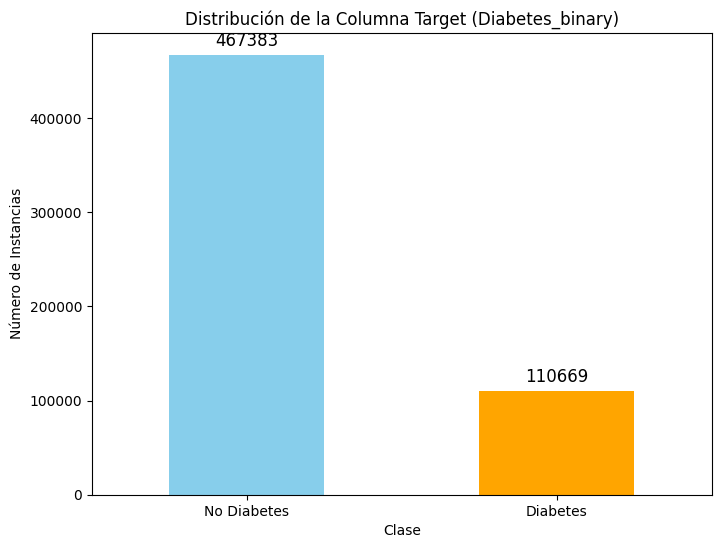

In [15]:
import matplotlib.pyplot as plt

# Contar las ocurrencias de cada clase en la columna objetivo
target_counts = df["Diabetes_binary"].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
bars = target_counts.plot(kind='bar', color=['skyblue', 'orange'])

# Agregar etiquetas de datos
for i in range(len(target_counts)):
    plt.text(i, target_counts[i] + 5000, str(target_counts[i]), ha='center', va='bottom', fontsize=12)

plt.title('Distribución de la Columna Target (Diabetes_binary)')
plt.xlabel('Clase')
plt.ylabel('Número de Instancias')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], rotation=0)
plt.show()


# 5. Comprensión de las variables
Todas las variables de mi df son numéricas, algo que ha simplificado mucho la limpieza del mismo. Como observamos en la siguiente celda todas son de tipo float64.

In [16]:
X_train.dtypes

HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [17]:
# Iterar sobre cada columna y mostrar el value counts
for col in X_train.columns:
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
    print(f"Value counts de la columna '{col}':")
    print(df[col].value_counts())

'''La unica columna que se podria considerar numérica continua es BMI el resto son 
binarias o con menos de 10 categorias'''


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Value counts de la columna 'HighBP':
HighBP
0.0    320562
1.0    257490
Name: count, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Value counts de la columna 'HighChol':
HighChol
0.0    325707
1.0    252345
Name: count, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Value counts de la columna 'CholCheck':
CholCheck
1.0    557363
0.0     20689
Name: count, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Value counts de la columna 'BMI':
BMI
27.0    55539
26.0    46099
24.0    43492
25.0    38323
28.0    37673
        ...  
78.0        3
85.0        3
91.0        2
90.0        2
96.0        2
Name: count, Length: 84, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Value counts de la columna 'Smoker':
Smoker
0.0    319608
1.0    258444
Name: count, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Value counts de la columna 'Stroke':
Stroke
0.0    553073
1.0     24979
Name: count, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

'La unica columna que se podria considerar numérica continua es BMI el resto son \nbinarias o con menos de 10 categorias'

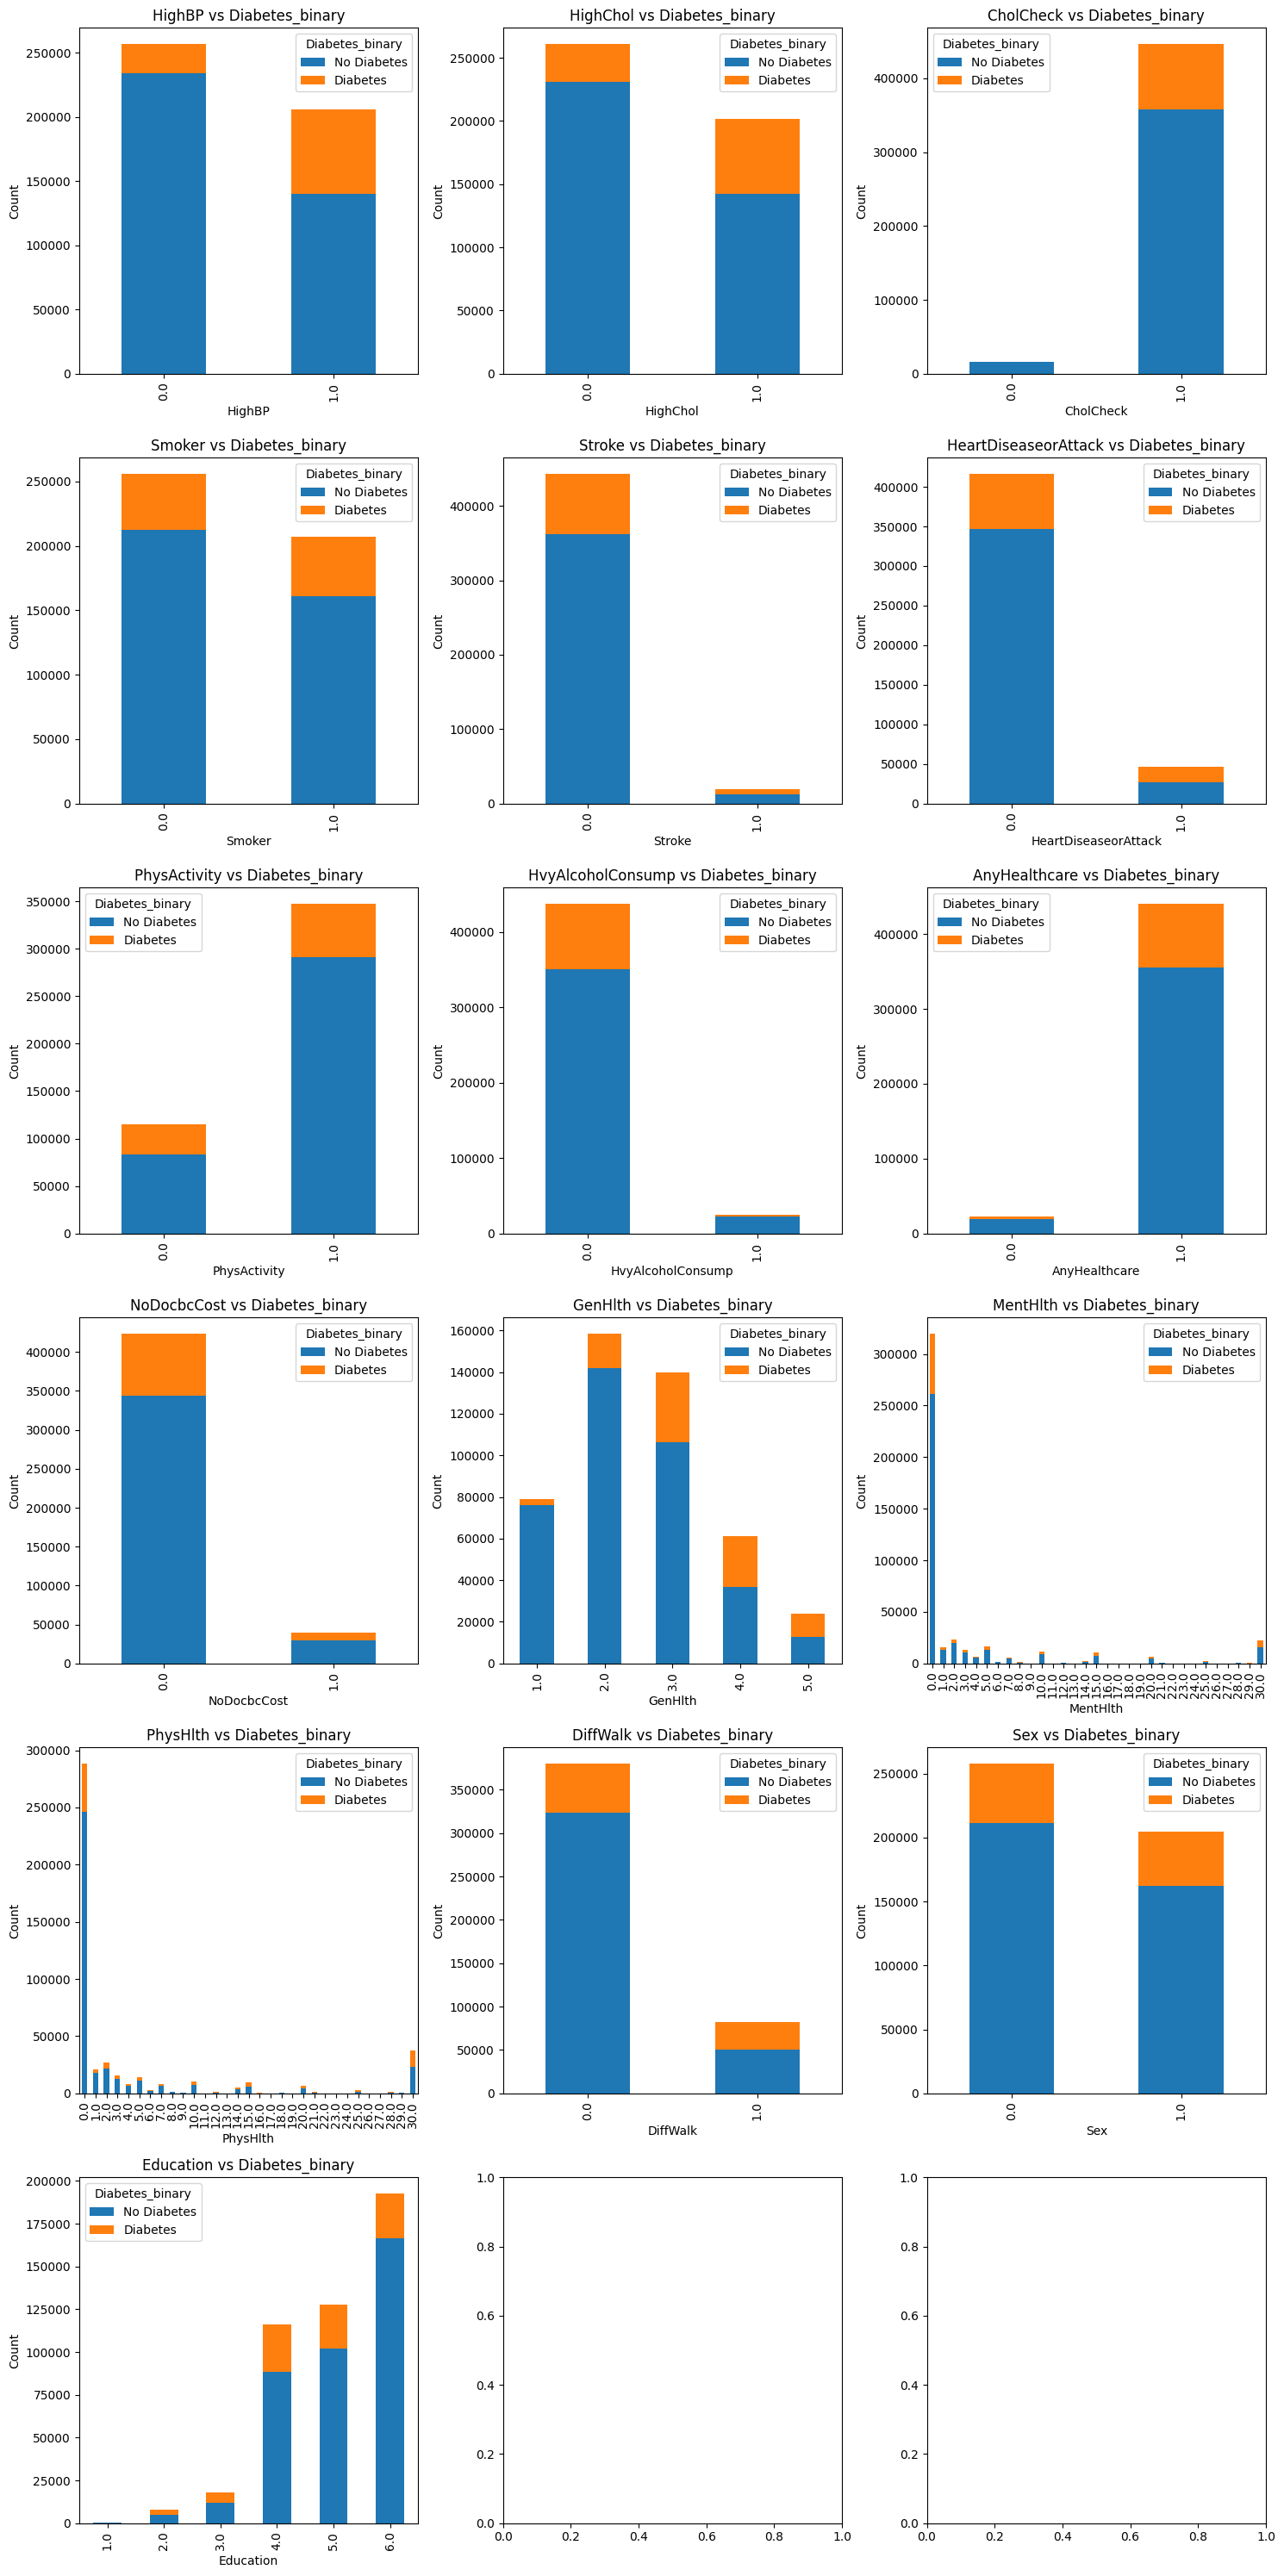

In [18]:
# Definimos las características categóricas
categorical_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
                        'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 
                        'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 
                        'PhysHlth', 'DiffWalk', 'Sex', 'Education']

# Calculamos el número de filas necesarias
num_plots = len(categorical_features)
num_rows = num_plots // 3
if num_plots % 3 != 0:
    num_rows += 1

# Creamos subgráficos con 3 columnas y el número adecuado de filas
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

# Creamos un gráfico de barras enfrentadas para cada característica categórica
for i, feature in enumerate(categorical_features):
    # Calculamos las coordenadas del subgráfico
    row = i // 3
    col = i % 3
    
    # Agrupamos por la característica categórica y la variable objetivo
    grouped = X_train.groupby([feature, y_train]).size().unstack()
    
    # Graficamos en el subgráfico correspondiente
    ax = axes[row, col]
    grouped.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'{feature} vs Diabetes_binary')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title='Diabetes_binary', labels=['No Diabetes', 'Diabetes'])

# Ajustamos el espaciado entre subgráficos y mostramos
plt.tight_layout()
plt.show()



# 5. Correlación

La correlación entre variables es un aspecto crucial para comprender las relaciones y dependencias dentro de los datos. Al examinar la matriz de correlación, podemos identificar qué variables están fuertemente correlacionadas, lo que puede ayudar en la selección de características y la construcción del modelo.


In [19]:
import pandas as pd

# Concatenar X_train y y_train en un solo DataFrame
df_concat = pd.concat([X_train, y_train], axis=1)

# Calcular la correlación entre las características y el objetivo
correlation_with_target = df_concat.corr()[y_train.name].sort_values(ascending=False)

print(correlation_with_target)



Diabetes_binary         1.000000
GenHlth                 0.326362
HighBP                  0.295003
BMI                     0.242039
DiffWalk                0.238788
HighChol                0.227221
Age                     0.202508
HeartDiseaseorAttack    0.191778
PhysHlth                0.187777
Stroke                  0.113838
MentHlth                0.078255
CholCheck               0.075130
Smoker                  0.067493
NoDocbcCost             0.036993
Sex                     0.034894
AnyHealthcare           0.017102
Fruits                 -0.043509
Veggies                -0.063141
HvyAlcoholConsump      -0.064742
PhysActivity           -0.131476
Education              -0.140243
Income                 -0.184052
Name: Diabetes_binary, dtype: float64


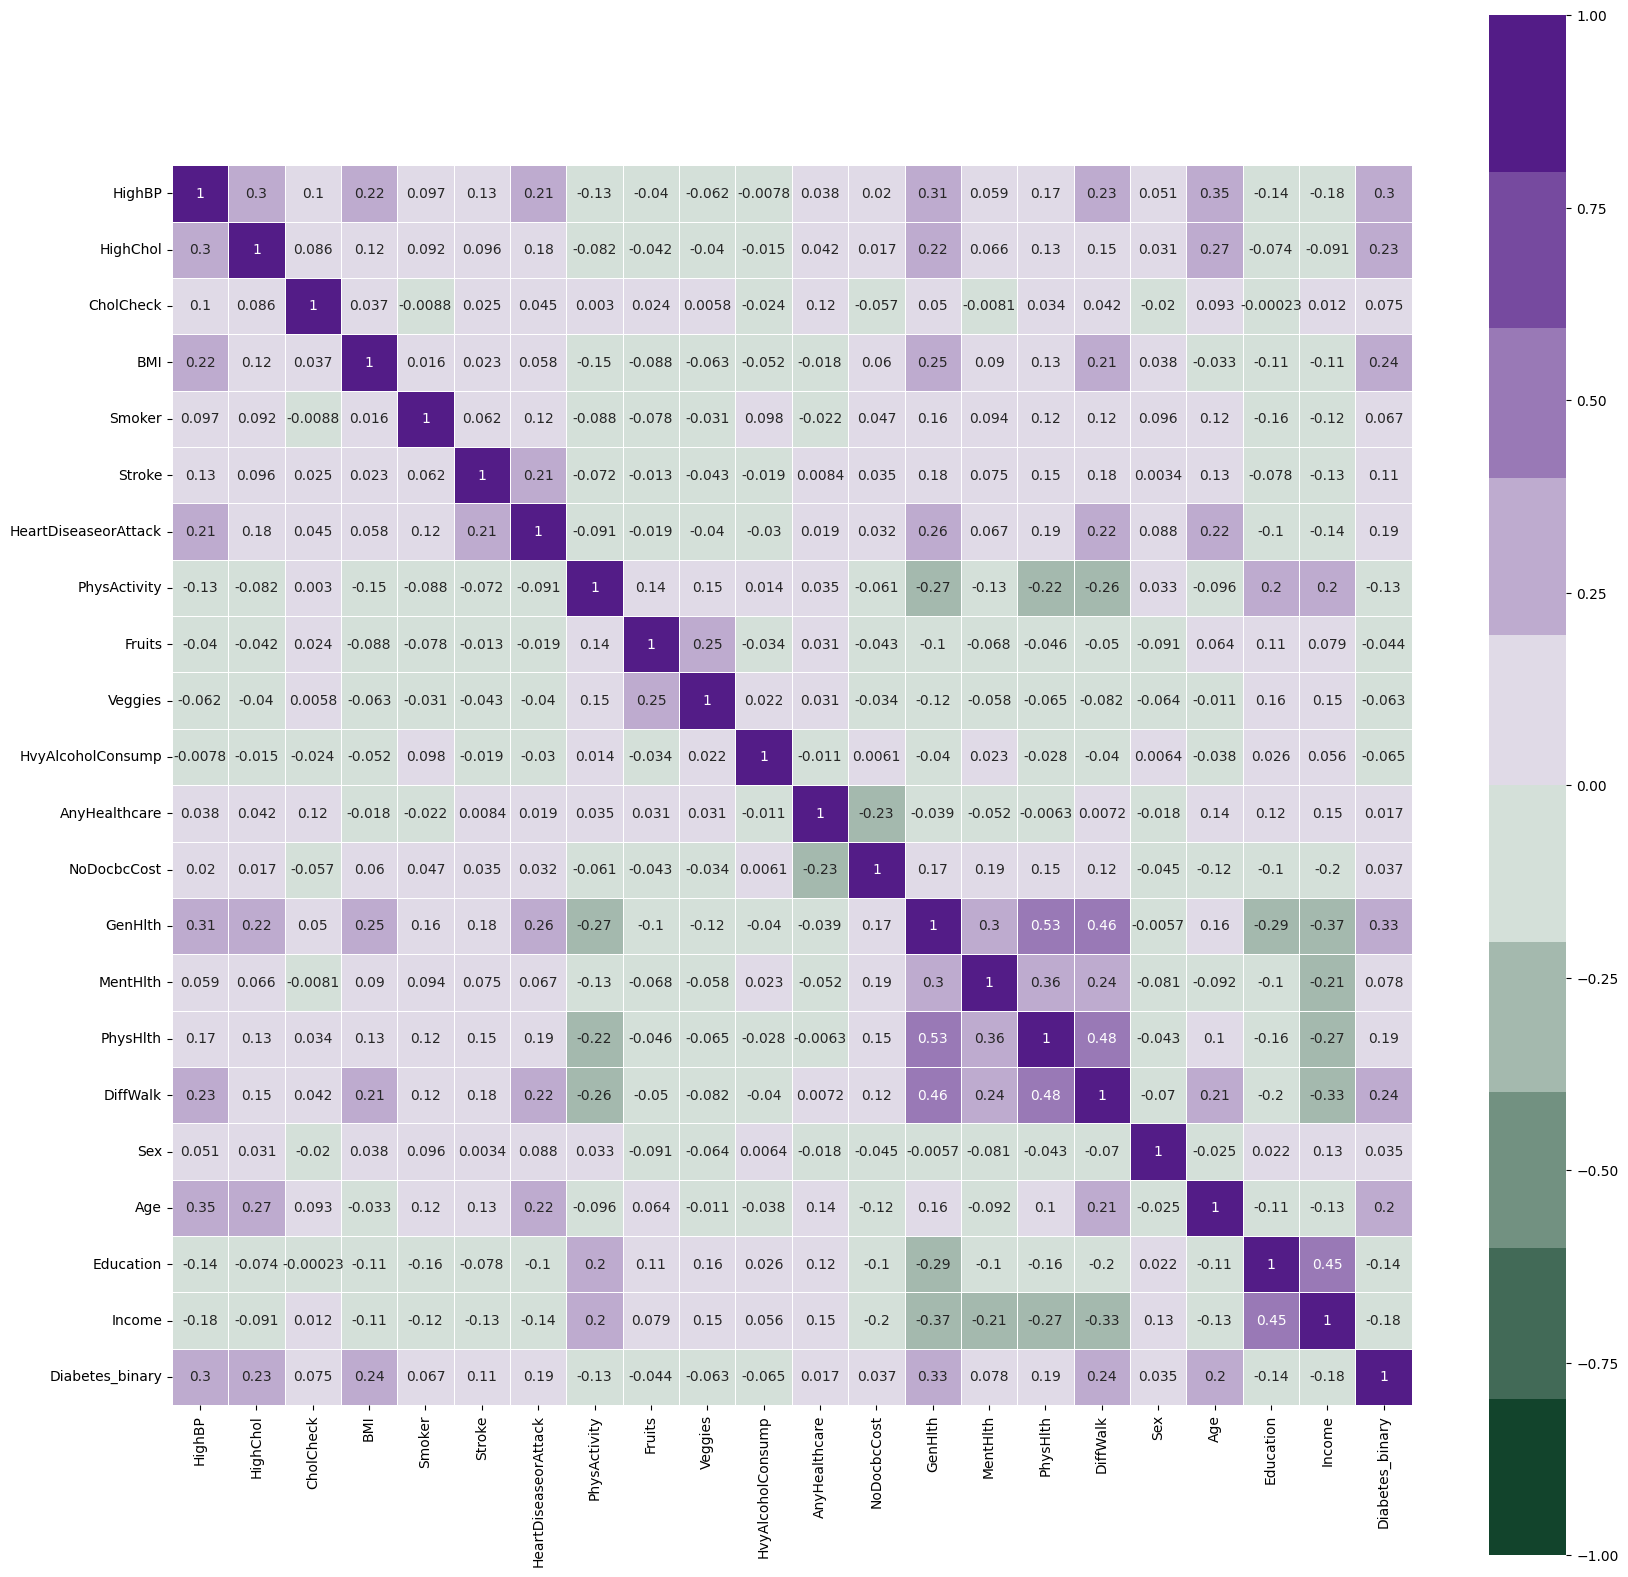

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcula la correlación entre X_train y y_train
correlation_matrix = df_concat.corr()

# Establece los límites de colores entre [-1, 1], así como un rango de colores de oscuro a oscuro, pasando por claro (0 correlación)
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix,
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5)
plt.show()


interval columns not set, guessing: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Diabetes_binary']


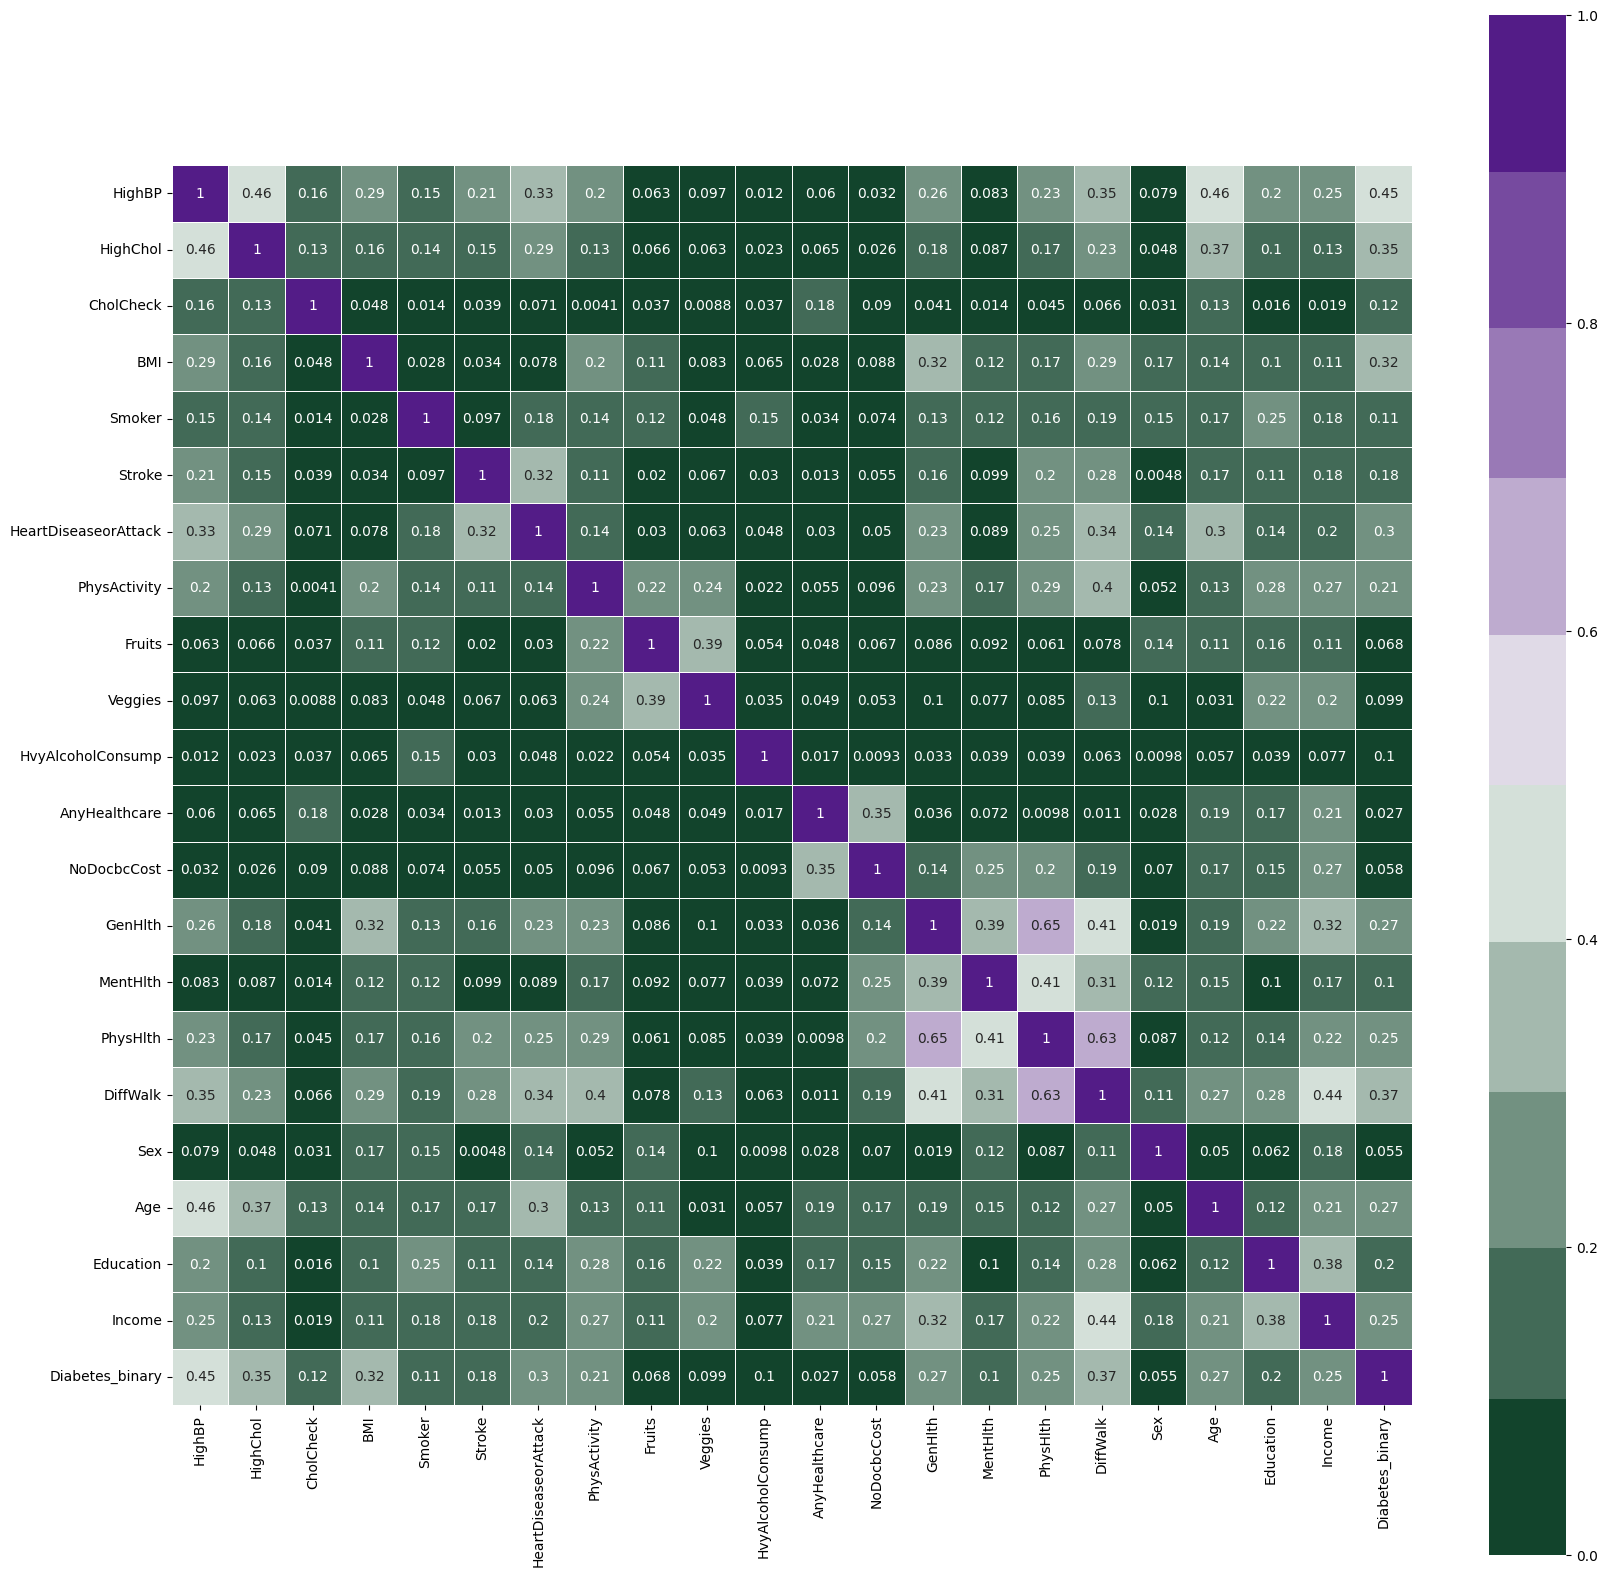

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import phik
# Calcula la matriz de correlación phi
phik_matrix = df_concat.phik_matrix()

# Establece los límites de colores entre [0, 1], con 1 siendo la correlación máxima
plt.figure(figsize=(20, 20))
sns.heatmap(phik_matrix,
            vmin=0,
            vmax=1,
            center=0.5,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5)
plt.show()


# 6. Transformaciones de features
En este caso el df se encuentra limpio y escalado. No necesita a mi parecer ningun cambio

# 7. Elección del modelo

## Uso de Red Neuronal con GPU

### Comentarios:
- En este código, se intenta utilizar una red neuronal para realizar la clasificación, aprovechando el uso de la GPU.
- Se importan las librerías necesarias, incluyendo TensorFlow y Keras.
- Se normalizan los datos para que estén en un rango común.
- Se define la arquitectura del modelo de red neuronal utilizando capas densas.
- El modelo se compila especificando el optimizador, la función de pérdida y las métricas.
- Se entrena el modelo utilizando la GPU y se evalúa su rendimiento en el conjunto de prueba.

## Comparación de Modelos y Resultados

### Comentarios:
- En este código, se comparan tres modelos de clasificación: Regresión Logística, Árbol de Decisión y Bosques Aleatorios.
- Se definen los modelos y se entrenan utilizando paralelización en CPU para aprovechar todos los núcleos disponibles.
- Se evalúan los modelos utilizando métricas de evaluación como precisión, exhaustividad, F1-score y ROC AUC.
- Se selecciona el modelo de Bosques Aleatorios debido a su mejor rendimiento en términos de métricas de evaluación.

## Búsqueda de Hiperparámetros con Grid Search

### Comentarios:
- En este código, se realiza una búsqueda de hiperparámetros para el modelo de Bosques Aleatorios utilizando Grid Search.
- Los datos se dividen en conjuntos de entrenamiento y prueba.
- Se define el modelo de Bosques Aleatorios y la cuadrícula de hiperparámetros a explorar.
- Se utiliza validación cruzada para evaluar diferentes combinaciones de hiperparámetros.
- Se selecciona el modelo con los mejores hiperparámetros encontrados mediante Grid Search.
- Se evalúa el modelo final en el conjunto de prueba y se muestran las métricas de evaluación y los mejores hiperparámetros.


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Suponiendo que tienes tu DataFrame df y la columna objetivo es 'Diabetes_binary'

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df.drop('Diabetes_binary', axis=1), df['Diabetes_binary'], test_size=0.2, random_state=42)

# Normalizar los datos
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

# Definir el modelo
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
with tf.device('/GPU:0'):
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluar el modelo
y_pred = model.predict(X_test)
y_pred_binary = [1 if y >= 0.5 else 0 for y in y_pred]
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred_binary)

# Mostrar métricas de evaluación
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)





Epoch 1/10


14452/14452 [==============================] - 37s 2ms/step - loss: 0.3920 - accuracy: 0.8179
Epoch 2/10
14452/14452 [==============================] - 34s 2ms/step - loss: 0.3859 - accuracy: 0.8202
Epoch 3/10
14452/14452 [==============================] - 35s 2ms/step - loss: 0.3841 - accuracy: 0.8216
Epoch 4/10
14452/14452 [==============================] - 34s 2ms/step - loss: 0.3827 - accuracy: 0.8221
Epoch 5/10
14452/14452 [==============================] - 35s 2ms/step - loss: 0.3810 - accuracy: 0.8233
Epoch 6/10
14452/14452 [==============================] - 35s 2ms/step - loss: 0.3791 - accuracy: 0.8238
Epoch 7/10
14452/14452 [==============================] - 35s 2ms/step - loss: 0.3775 - accuracy: 0.8244
Epoch 8/10
14452/14452 [==============================] - 36s 2ms/step - loss: 0.3767 - accuracy: 0.8255
Epoch 9/10
14452/14452 [==============================] - 36s 2ms/step - loss: 0.3758 - accuracy: 0.8257
Epoch 10/10
3613/3613 [===========================

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from joblib import parallel_backend

# Suponiendo que tienes tu DataFrame df y la columna objetivo es 'Diabetes_binary'

# Definir modelos
models = {
    'Logistic Regression': LogisticRegression(n_jobs=-1,max_iter=1000),  # Utiliza todos los núcleos disponibles
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_jobs=-1),  # Utiliza todos los núcleos disponibles
    
}

# Entrenar y evaluar modelos con paralelización en CPU
results = {}
for name, model in models.items():
    with parallel_backend('threading'):  # Paralelizar en CPU
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'ROC AUC': roc_auc}

# Convertir los resultados en un DataFrame para su visualización
results_df = pd.DataFrame(results).T
print(results_df)


                     Accuracy  Precision    Recall  F1-score   ROC AUC
Logistic Regression  0.823693   0.584751  0.267593  0.367164  0.611345
Decision Tree        0.954875   0.869075  0.899398  0.883976  0.933691
Random Forest        0.965816   0.919576  0.899851  0.909607  0.940627


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Definir el modelo Random Forest
rf_model = RandomForestClassifier(n_jobs=-1, random_state=42)

# Definir la cuadrícula de hiperparámetros a buscar
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20],       # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],   # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4]      # Número mínimo de muestras requeridas en cada hoja
}

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_rf_model = grid_search.best_estimator_

# Hacer predicciones en el conjunto de prueba
y_pred = best_rf_model.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Mostrar las métricas de evaluación
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(grid_search.best_params_)


'import pandas as pd\nfrom sklearn.model_selection import train_test_split, GridSearchCV\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score\n\n\n# Definir el modelo Random Forest\nrf_model = RandomForestClassifier(n_jobs=-1, random_state=42)\n\n# Definir la cuadrícula de hiperparámetros a buscar\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],  # Número de árboles en el bosque\n    \'max_depth\': [None, 10, 20],       # Profundidad máxima de los árboles\n    \'min_samples_split\': [2, 5, 10],   # Número mínimo de muestras requeridas para dividir un nodo\n    \'min_samples_leaf\': [1, 2, 4]      # Número mínimo de muestras requeridas en cada hoja\n}\n\n# Realizar la búsqueda de hiperparámetros utilizando validación cruzada\ngrid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring=\'accuracy\', n_jobs=-1)\ngrid_search.fit(X_train, y_train)\n\n# Obtener e

In [19]:
'''"import pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Supongamos que tu DataFrame se llama df\n# Definimos las características categóricas\ncategorical_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', \n                        'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', \n                        'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', \n                        'PhysHlth', 'DiffWalk', 'Sex', 'Education']\n\n# Creamos un gráfico de barras enfrentadas para cada característica categórica\nfor feature in categorical_features:\n    # Agrupamos por la característica categórica y la variable objetivo\n    grouped = df.groupby([feature, 'Diabetes_binary']).size().unstack()\n    \n    # Graficamos\n    grouped.plot(kind='bar', stacked=True)\n    plt.title(f'{feature} vs Diabetes_binary')\n    plt.xlabel(feature)\n    plt.ylabel('Count')\n    plt.legend(title='Diabetes_binary', labels=['No Diabetes', 'Diabetes'])\n    plt.show()\n"
Diabetes_binary
0.0    467383
1.0    110669
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 578052 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       578052 non-null  float64
 1   HighBP                578052 non-null  float64
 2   HighChol              578052 non-null  float64
 3   CholCheck             578052 non-null  float64
 4   BMI                   578052 non-null  float64
 5   Smoker                578052 non-null  float64
 6   Stroke                578052 non-null  float64
 7   HeartDiseaseorAttack  578052 non-null  float64
 8   PhysActivity          578052 non-null  float64
 9   Fruits                578052 non-null  float64
 10  Veggies               578052 non-null  float64
 11  HvyAlcoholConsump     578052 non-null  float64
 12  AnyHealthcare         578052 non-null  float64
 13  NoDocbcCost           578052 non-null  float64
 14  GenHlth               578052 non-null  float64
 15  MentHlth              578052 non-null  float64
 16  PhysHlth              578052 non-null  float64
 17  DiffWalk              578052 non-null  float64
 18  Sex                   578052 non-null  float64
 19  Age                   578052 non-null  float64
 20  Education             578052 non-null  float64
 21  Income                578052 non-null  float64
dtypes: float64(22)
memory usage: 101.4 MB
"import pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Supongamos que tu DataFrame se llama df\n# Definimos las características categóricas\ncategorical_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', \n                        'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', \n                        'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', \n                        'PhysHlth', 'DiffWalk', 'Sex', 'Education']\n\n# Creamos un gráfico de barras enfrentadas para cada característica categórica\nfor feature in categorical_features:\n    # Agrupamos por la característica categórica y la variable objetivo\n    grouped = df.groupby(['Diabetes_binary', feature]).size().unstack()\n    \n    # Graficamos\n    grouped.plot(kind='bar', stacked=True)\n    plt.title(f'Diabetes_binary vs {feature}')\n    plt.xlabel('Diabetes_binary')\n    plt.ylabel('Count')\n    plt.legend(title=feature, labels=grouped.columns)\n    plt.show()\n"
Diabetes_binary	HighBP	HighChol	CholCheck	BMI	Smoker	Stroke	HeartDiseaseorAttack	PhysActivity	Fruits	...	AnyHealthcare	NoDocbcCost	GenHlth	MentHlth	PhysHlth	DiffWalk	Sex	Age	Education	Income
0	0.0	1.0	1.0	1.0	40.0	1.0	0.0	0.0	0.0	0.0	...	1.0	0.0	5.0	18.0	15.0	1.0	0.0	9.0	4.0	3.0
1	0.0	0.0	0.0	0.0	25.0	1.0	0.0	0.0	1.0	0.0	...	0.0	1.0	3.0	0.0	0.0	0.0	0.0	7.0	6.0	1.0
2	0.0	1.0	1.0	1.0	28.0	0.0	0.0	0.0	0.0	1.0	...	1.0	1.0	5.0	30.0	30.0	1.0	0.0	9.0	4.0	8.0
3	0.0	1.0	0.0	1.0	27.0	0.0	0.0	0.0	1.0	1.0	...	1.0	0.0	2.0	0.0	0.0	0.0	0.0	11.0	3.0	6.0
4	0.0	1.0	1.0	1.0	24.0	0.0	0.0	0.0	1.0	1.0	...	1.0	0.0	2.0	3.0	0.0	0.0	0.0	11.0	5.0	4.0
...	...	...	...	...	...	...	...	...	...	...	...	...	...	...	...	...	...	...	...	...	...
253675	0.0	1.0	1.0	1.0	45.0	0.0	0.0	0.0	0.0	1.0	...	1.0	0.0	3.0	0.0	5.0	0.0	1.0	5.0	6.0	7.0
253676	1.0	1.0	1.0	1.0	18.0	0.0	0.0	0.0	0.0	0.0	...	1.0	0.0	4.0	0.0	0.0	1.0	0.0	11.0	2.0	4.0
253677	0.0	0.0	0.0	1.0	28.0	0.0	0.0	0.0	1.0	1.0	...	1.0	0.0	1.0	0.0	0.0	0.0	0.0	2.0	5.0	2.0
253678	0.0	1.0	0.0	1.0	23.0	0.0	0.0	0.0	0.0	1.0	...	1.0	0.0	3.0	0.0	0.0	0.0	1.0	7.0	5.0	1.0
253679	1.0	1.0	1.0	1.0	25.0	0.0	0.0	1.0	1.0	1.0	...	1.0	0.0	2.0	0.0	0.0	0.0	0.0	9.0	6.0	2.0
578052 rows × 22 columns

'import pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score\nimport tensorflow as tf\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense\n\n# Suponiendo que tienes tu DataFrame df y la columna objetivo es \'Diabetes_binary\'\n\n# Dividir los datos en conjuntos de entrenamiento y prueba\nX_train, X_test, y_train, y_test = train_test_split(df.drop(\'Diabetes_binary\', axis=1), df[\'Diabetes_binary\'], test_size=0.2, random_state=42)\n\n# Normalizar los datos\nX_train = tf.keras.utils.normalize(X_train, axis=1)\nX_test = tf.keras.utils.normalize(X_test, axis=1)\n\n# Definir el modelo\nmodel = Sequential()\nmodel.add(Dense(128, activation=\'relu\', input_shape=(X_train.shape[1],)))\nmodel.add(Dense(64, activation=\'relu\'))\nmodel.add(Dense(1, activation=\'sigmoid\'))\n\n# Compilar el modelo\nmodel.compile(optimizer=\'adam\', loss=\'binary_crossentropy\', metrics=[\'accuracy\'])\n\n# Entrenar el modelo\nwith tf.device(\'/GPU:0\'):\n    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)\n\n# Evaluar el modelo\ny_pred = model.predict(X_test)\ny_pred_binary = [1 if y >= 0.5 else 0 for y in y_pred]\naccuracy = accuracy_score(y_test, y_pred_binary)\nprecision = precision_score(y_test, y_pred_binary)\nrecall = recall_score(y_test, y_pred_binary)\nf1 = f1_score(y_test, y_pred_binary)\nroc_auc = roc_auc_score(y_test, y_pred_binary)\n\n# Mostrar métricas de evaluación\nprint("Accuracy:", accuracy)\nprint("Precision:", precision)\nprint("Recall:", recall)\nprint("F1-score:", f1)\nprint("ROC AUC:", roc_auc)'
                     Accuracy  Precision    Recall  F1-score   ROC AUC
Logistic Regression  0.823693   0.584751  0.267593  0.367164  0.611345
Decision Tree        0.955151   0.869968  0.899851  0.884657  0.934035
Random Forest        0.965332   0.917355  0.899670  0.908426  0.940259
Accuracy: 0.9658164015534854
Precision: 0.9210562955399824
Recall: 0.8981309680047065
F1-score: 0.9094491797268811
ROC AUC: 0.9399705891203035
Mejores hiperparámetros:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}'''

'"import pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Supongamos que tu DataFrame se llama df\n# Definimos las características categóricas\ncategorical_features = [\'HighBP\', \'HighChol\', \'CholCheck\', \'Smoker\', \'Stroke\', \n                        \'HeartDiseaseorAttack\', \'PhysActivity\', \'HvyAlcoholConsump\', \n                        \'AnyHealthcare\', \'NoDocbcCost\', \'GenHlth\', \'MentHlth\', \n                        \'PhysHlth\', \'DiffWalk\', \'Sex\', \'Education\']\n\n# Creamos un gráfico de barras enfrentadas para cada característica categórica\nfor feature in categorical_features:\n    # Agrupamos por la característica categórica y la variable objetivo\n    grouped = df.groupby([feature, \'Diabetes_binary\']).size().unstack()\n    \n    # Graficamos\n    grouped.plot(kind=\'bar\', stacked=True)\n    plt.title(f\'{feature} vs Diabetes_binary\')\n    plt.xlabel(feature)\n    plt.ylabel(\'Count\')\n    plt.legend(title=\'Diabetes_binary\',

Matriz de Confusión:
[[91774  1740]
 [ 2223 19874]]


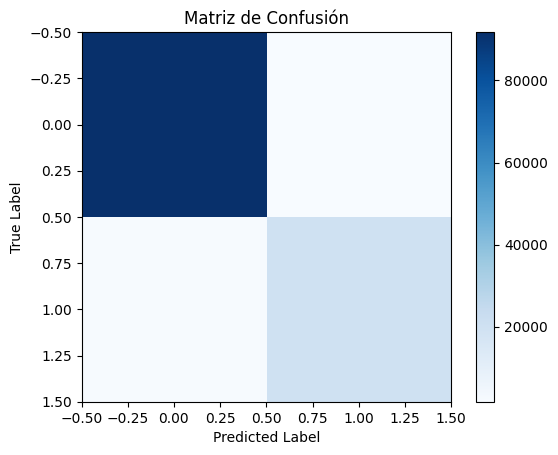

Accuracy: 0.9657212548978903
Precision: 0.9194966225594522
Recall: 0.8993981083404987
F1-score: 0.9093363226647755
ROC AUC: 0.9403956343614507


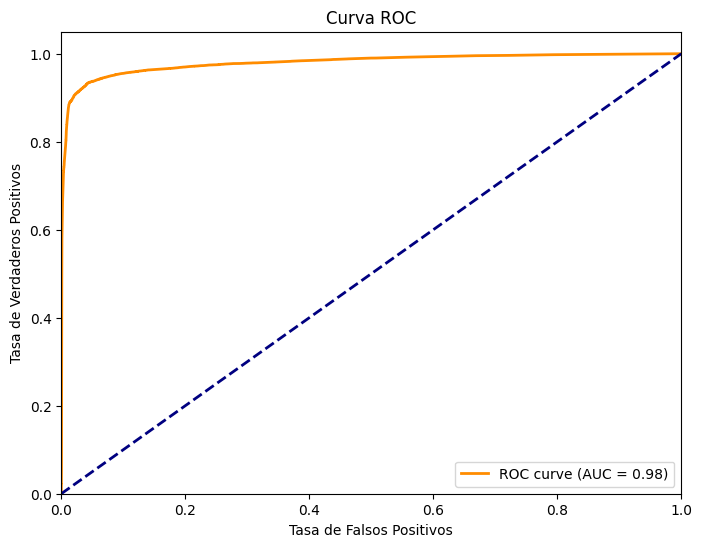

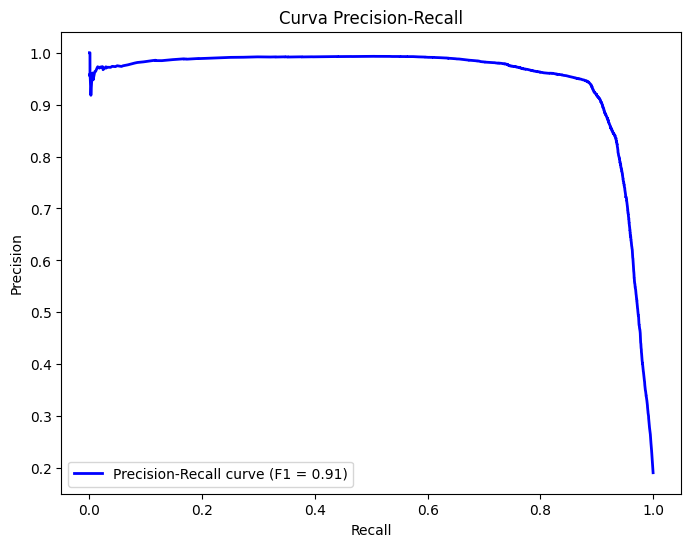

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split


# Definir los hiperparámetros
params = {'max_depth': None,
          'min_samples_leaf': 1,
          'min_samples_split': 2,
          'n_estimators': 300}

# Inicializar el modelo
rf_model = RandomForestClassifier(**params,n_jobs=-1)

rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Plot confusion matrix
plt.imshow(conf_matrix, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
plt.title('Matriz de Confusión')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calcular los indicadores de rendimiento
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Imprimir los indicadores de rendimiento
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC AUC: {roc_auc}")

# Calcular la probabilidad de clase 1 para las curvas ROC
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calcular la tasa de verdaderos positivos, la tasa de falsos positivos y el umbral para las curvas ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el área bajo la curva ROC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Calcular la curva de precisión-recuperación y el puntaje F1
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

# Graficar la curva de precisión-recuperación
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (F1 = {f1:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.show()


In [ ]:
import pickle

# Guardar el modelo en un archivo
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# Cargar el modelo desde el archivo
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


